In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset into a pandas DataFrame

df = pd.read_csv('dataset_for_beats_externship.csv')
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R1KTX4USE1JN2Y,B08YRT9T38,"5.0 out of 5 stars Beautiful Sound, Beautiful ...",Ethan Barbee,5,This is the third different B&O speaker I've b...,"Reviewed in the United States September 2, 2024",AEOMNSFUKAOLDVBX7HYX64VEXTEQ,True,0,Color: NavyStyle: Bluetooth speaker
1,R2HAQUWSTPUU1B,B08YRT9T38,"5.0 out of 5 stars Great sound, compact, very ...",Bridget Brooks,5,I typically goes to Bose speakers as my first ...,"Reviewed in the United States July 22, 2024",AEK6OWCPNNGR5I2IFKONWQBWN5GQ,True,1,Color: NavyStyle: Bluetooth speaker
2,R2OXTERJCBYAF0,B08YRT9T38,"5.0 out of 5 stars Nice little speaker, sweet ...",P. Mumford,5,I bought this to take into my backyard in the ...,"Reviewed in the United States July 27, 2024",AEQ34ZA5DNYEPTKOIOMUUUKHPUWQ,True,2,Color: Grey MistStyle: Bluetooth speaker
3,R2N9LGOT33J14T,B08YRT9T38,4.0 out of 5 stars A Posh Music speaker!,RT - Gadget Guy,4,B&O makes posh high end audio gear….gear which...,"Reviewed in the United States March 3, 2024",AE6TVTGGPRUEMJMSIV5SX6NDA2PA,True,7,Color: NavyStyle: Bluetooth speaker
4,R2X7LV4K100RNI,B08YRT9T38,5.0 out of 5 stars Natural true sounding speaker.,hubbabubba66,5,Sound quality is very good. The app provides p...,"Reviewed in the United States June 24, 2024",AGDYLA7QS2TXWBTITQ2OMV7XNSQQ,True,4,Color: Black AnthraciteStyle: Bluetooth speaker


In [ ]:
df.shape

(1685, 11)

Check Data Types

In [ ]:
# Check the data types of each column
print(df.dtypes)

review_id             object
product_id            object
title                 object
author                object
rating                 int64
content               object
timestamp             object
profile_id            object
is_verified             bool
helpful_count          int64
product_attributes    object
dtype: object


In [ ]:
df['is_verified'] = df['is_verified'].astype(int)

In [ ]:
# Check the unique data types in each column (especially useful for 'rating')
for col in df.columns:
    print(f"Unique data types in {col}: {df[col].apply(lambda x: type(x)).unique()}")

Unique data types in review_id: [<class 'str'>]
Unique data types in product_id: [<class 'str'>]
Unique data types in title: [<class 'str'>]
Unique data types in author: [<class 'str'>]
Unique data types in rating: [<class 'int'>]
Unique data types in content: [<class 'str'> <class 'float'>]
Unique data types in timestamp: [<class 'str'>]
Unique data types in profile_id: [<class 'str'>]
Unique data types in is_verified: [<class 'int'>]
Unique data types in helpful_count: [<class 'int'>]
Unique data types in product_attributes: [<class 'str'> <class 'float'>]


In [ ]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

review_id              0
product_id             0
title                  0
author                 0
rating                 0
content                3
timestamp              0
profile_id             0
is_verified            0
helpful_count          0
product_attributes    34
dtype: int64


There are missing values in the `content` and `product_attributes` columns.
After analyzing the missing data

Drop Missing Values

Drop Rows: As the missing data is less significant, and those rows don't add much value, dropping them is generally safe.

In [ ]:
df = df.dropna(subset=['content', 'product_attributes'])

In [ ]:
# Crosschecking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
dtype: int64


Check for Duplicates

In [ ]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Drop duplicates
df = df.drop_duplicates()

Number of duplicate rows: 100


**Handle Outliers**

Outliers can significantly impact our analysis, making it crucial to identify and appropriately handle them. Statistical methods such as the Interquartile Range (IQR) and Z-scores are effective techniques for detecting these outliers.

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['rating', 'is_verified', 'helpful_count'], dtype='object')


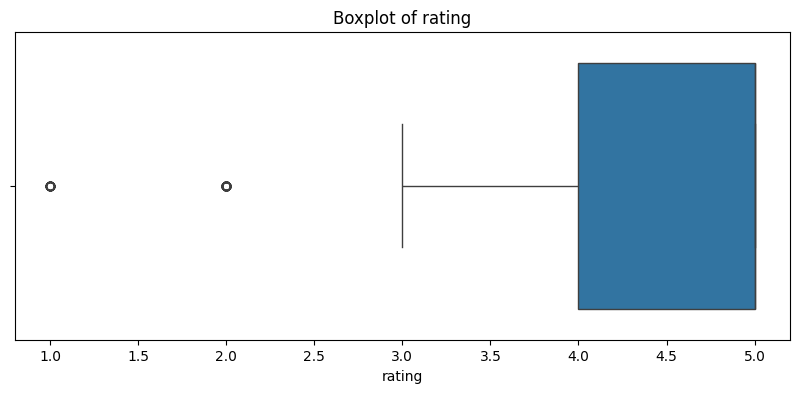

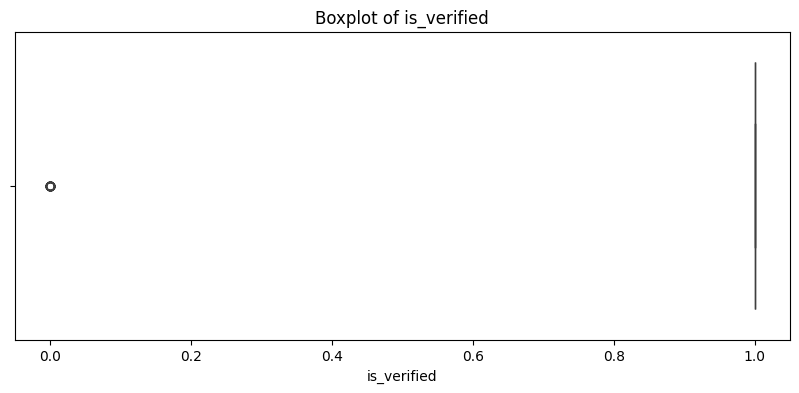

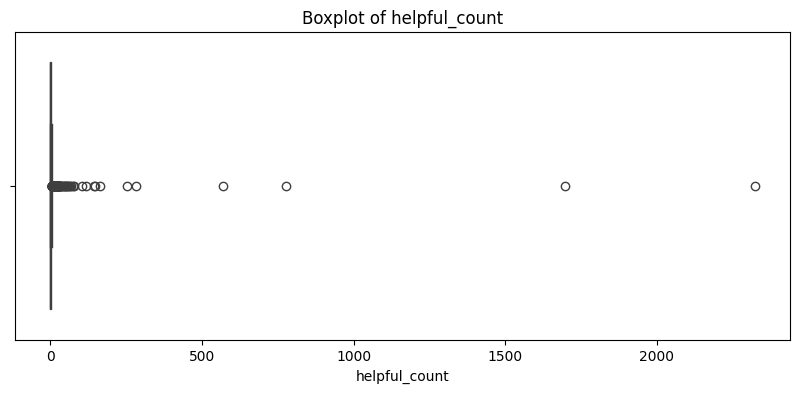

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Remove Outliers**

In [ ]:
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

df = df[(df['is_verified'] != 0) & (df['is_verified'] != 5) & (df['helpful_count'] < 500)]

Filter Non-Verified Entries (is_verified):

We are retaining only the rows where is_verified is not 0 or 5, focusing on entries that are likely to be valid and trustworthy.

Limit Helpful Count to Less Than 500:

We are excluding rows with a helpful_count of 500 or more, keeping only reviews with a helpful_count of less than 500. This helps us focus on reviews that are considered helpful without being excessively high, which might indicate potential manipulation or anomalies.

**Checking the Impact of Outlier Handling**

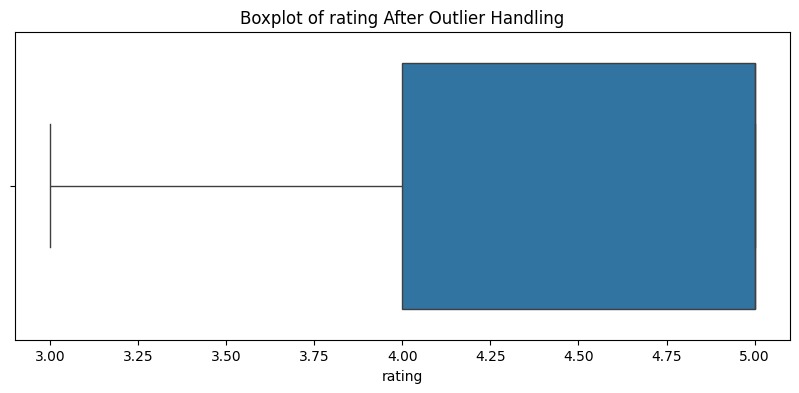

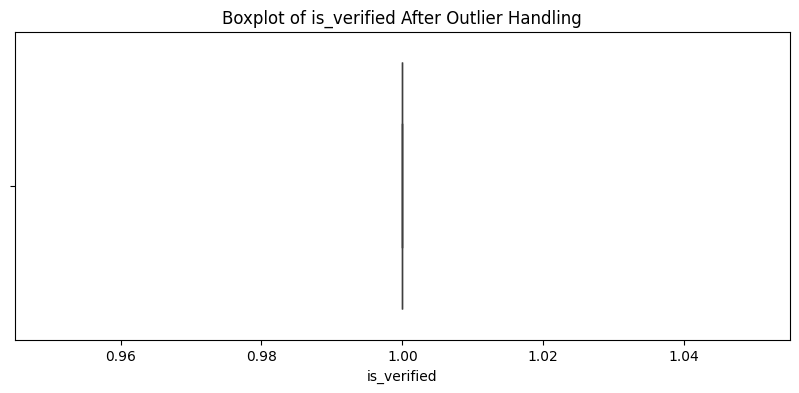

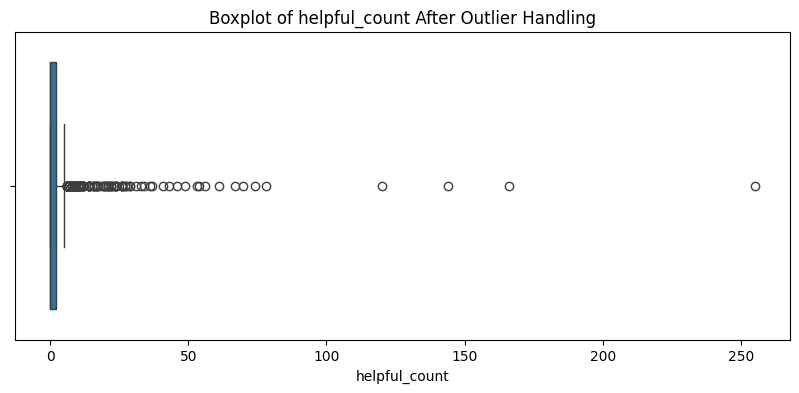

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} After Outlier Handling')
    plt.show()


In [ ]:
df.shape

(1430, 11)

**Identify Categorical and Numerical Variables**

In [ ]:
# List all columns in the dataset
print(df.columns)

# Identify categorical variables (usually of type 'object' or 'category')
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Variables:")
print(categorical_vars)

# Identify numerical variables (usually of type 'int64' or 'float64')
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Variables:")
print(numerical_vars)

Index(['review_id', 'product_id', 'title', 'author', 'rating', 'content',
       'timestamp', 'profile_id', 'is_verified', 'helpful_count',
       'product_attributes'],
      dtype='object')
Categorical Variables:
Index(['review_id', 'product_id', 'title', 'author', 'content', 'timestamp',
       'profile_id', 'product_attributes'],
      dtype='object')
Numerical Variables:
Index(['rating', 'is_verified', 'helpful_count'], dtype='object')


**Nominal Variables:** These variables have categories with no inherent order or ranking:
**product_id**: This identifies different products, but there’s no order among them. Each product is simply a category.

**author**: The name or identifier of the person who wrote the review. There’s no ranking among authors.

**review_id**: Unique identifier for each review. No inherent order or ranking.

**profile_id**: Identifier for the reviewer's profile. No ranking, just a category.

**product_attributes**: Describes product features like color or style. These are typically nominal because there's no natural order among different colors or styles.

**title**: The title of the review. This is text data and treated as nominal if used categorically.

**content**: The body of the review. This is also text data and can be treated as nominal if you are categorizing it in some way.

**Ordinal Variables**: These variables have categories with a meaningful order:
rating: Ratings typically have a natural order (e.g., 1 star < 2 stars < 3 stars, etc.). This makes rating an ordinal variable.

Nominal Variables (e.g., product_id, author, product_attributes):



**Encoding Method**: One-hot encoding is typically used to convert these into a numerical format.

In [ ]:
#df = pd.get_dummies(df, columns=['product_id', 'product_attributes'], drop_first=True)

In [ ]:
df.to_csv('cleaned_data_for_beats_externship.csv', index=False)

In [ ]:
product_names = {"B099TJGJ91": "Bose SoundLink Flex Bluetooth Portable Speaker",
    "B08X4YMTPM": "JBL CHARGE 5 - Portable Waterproof (IP67) Bluetooth Speaker",
    "B09XXW54QG": "Marshall Emberton II Compact Portable Bluetooth Speaker",
    "B0CF7GYNW2": "SAMSUNG Galaxy Buds FE True Wireless Bluetooth Earbuds",
    "B08BCHKY52": "Soundcore 3 by Anker, Bluetooth Speaker with Stereo Sound",
    "B08MZZTH1N": "Tribit [Upgraded Version StormBox Pro Bluetooth Speaker",
    "B096SV8SJG": "Beats Studio Buds - True Wireless Noise Cancelling Earbuds",
    "B0B75RL6JX": "Skullcandy Rail In-Ear Wireless Earbuds",
    "B071JN4FW6": "DOSS SoundBox XL Bluetooth Speaker with Subwoofer",
    "B07DD3VXRZ": "Ultimate Ears, Boom 3 Wireless Bluetooth Speaker",
    "B0B43Y8GHZ": "Sony SRS-XG300 X-Series Wireless Portable-Bluetooth",
    "B08YRT9T38": "Bang & Olufsen Beosound Explore - Wireless Outdoor Bluetooth speaker",
    "B01IOD7KB6": "House of Marley - Get Together Bluetooth Portable Bluetooth Speaker",
    "B09572WYN8": "Retro Wooden Bluetooth Speaker, KONEX 40W Vintage Portable Wireless Speaker",
    "B0CTD6PRBY": "Raycon Everyday Earbuds (2024 Edition)",
    "B0D4SX9RC6": "Beats Pill - Bluetooth Speaker"}

In [ ]:
df['product_name'] = df['product_id'].map(product_names)

In [ ]:
df['product_name'].value_counts()

,count
product_name,
Bose SoundLink Flex Bluetooth Portable Speaker,100
JBL CHARGE 5 - Portable Waterproof (IP67) Bluetooth Speaker,100
Marshall Emberton II Compact Portable Bluetooth Speaker,100
SAMSUNG Galaxy Buds FE True Wireless Bluetooth Earbuds,100
"Soundcore 3 by Anker, Bluetooth Speaker with Stereo Sound",99
Tribit [Upgraded Version StormBox Pro Bluetooth Speaker,98
Beats Studio Buds - True Wireless Noise Cancelling Earbuds,97
Skullcandy Rail In-Ear Wireless Earbuds,95
DOSS SoundBox XL Bluetooth Speaker with Subwoofer,93


In [ ]:
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
0,R1KTX4USE1JN2Y,B08YRT9T38,"5.0 out of 5 stars Beautiful Sound, Beautiful ...",Ethan Barbee,5,This is the third different B&O speaker I've b...,"Reviewed in the United States September 2, 2024",AEOMNSFUKAOLDVBX7HYX64VEXTEQ,1,0,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...
1,R2HAQUWSTPUU1B,B08YRT9T38,"5.0 out of 5 stars Great sound, compact, very ...",Bridget Brooks,5,I typically goes to Bose speakers as my first ...,"Reviewed in the United States July 22, 2024",AEK6OWCPNNGR5I2IFKONWQBWN5GQ,1,1,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...
2,R2OXTERJCBYAF0,B08YRT9T38,"5.0 out of 5 stars Nice little speaker, sweet ...",P. Mumford,5,I bought this to take into my backyard in the ...,"Reviewed in the United States July 27, 2024",AEQ34ZA5DNYEPTKOIOMUUUKHPUWQ,1,2,Color: Grey MistStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...
3,R2N9LGOT33J14T,B08YRT9T38,4.0 out of 5 stars A Posh Music speaker!,RT - Gadget Guy,4,B&O makes posh high end audio gear….gear which...,"Reviewed in the United States March 3, 2024",AE6TVTGGPRUEMJMSIV5SX6NDA2PA,1,7,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...
4,R2X7LV4K100RNI,B08YRT9T38,5.0 out of 5 stars Natural true sounding speaker.,hubbabubba66,5,Sound quality is very good. The app provides p...,"Reviewed in the United States June 24, 2024",AGDYLA7QS2TXWBTITQ2OMV7XNSQQ,1,4,Color: Black AnthraciteStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1430 entries, 0 to 1684
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           1430 non-null   object
 1   product_id          1430 non-null   object
 2   title               1430 non-null   object
 3   author              1430 non-null   object
 4   rating              1430 non-null   int64 
 5   content             1430 non-null   object
 6   timestamp           1430 non-null   object
 7   profile_id          1430 non-null   object
 8   is_verified         1430 non-null   int64 
 9   helpful_count       1430 non-null   int64 
 10  product_attributes  1430 non-null   object
 11  product_name        1430 non-null   object
dtypes: int64(3), object(9)
memory usage: 145.2+ KB


In [ ]:
df.describe(include = 'all')

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
count,1430,1430,1430,1430,1430.000000,1430,1430,1430,1430.0,1430.000000,1430,1430
unique,1430,16,1292,1313,NaN,1426,566,1430,NaN,NaN,50,16
top,R1KTX4USE1JN2Y,B099TJGJ91,5.0 out of 5 stars Great sound,Amazon Customer,NaN,Good,"Reviewed in the United States August 25, 2024",AEOMNSFUKAOLDVBX7HYX64VEXTEQ,NaN,NaN,Color: Black,Bose SoundLink Flex Bluetooth Portable Speaker
freq,1,100,17,73,NaN,3,20,1,NaN,NaN,243,100
mean,NaN,NaN,NaN,NaN,4.610490,NaN,NaN,NaN,1.0,2.872727,NaN,NaN
std,NaN,NaN,NaN,NaN,0.622666,NaN,NaN,NaN,0.0,11.599837,NaN,NaN
min,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,1.0,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,1.0,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.0,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.0,2.000000,NaN,NaN


In [ ]:
numerical_summary = df.describe()
print("Numerical Summary:")
print(numerical_summary)

Numerical Summary:
            rating  is_verified  helpful_count
count  1430.000000       1430.0    1430.000000
mean      4.610490          1.0       2.872727
std       0.622666          0.0      11.599837
min       3.000000          1.0       0.000000
25%       4.000000          1.0       0.000000
50%       5.000000          1.0       0.000000
75%       5.000000          1.0       2.000000
max       5.000000          1.0     255.000000


In [ ]:

# Verify that missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
product_name          0
dtype: int64


In [ ]:
duplicates_after = df.duplicated().sum()
print(f"\nNumber of duplicate rows after removal: {duplicates_after}")


Number of duplicate rows after removal: 0


In [ ]:
categorical_columns = ['product_id','product_name', 'author', 'product_attributes']
for column in categorical_columns:
    frequency = df[column].value_counts()
    print(f"Frequency distribution for {column}:")
    print(frequency)
    print("\n")

Frequency distribution for product_id:
product_id
B099TJGJ91    100
B08X4YMTPM    100
B09XXW54QG    100
B0CF7GYNW2    100
B08BCHKY52     99
B08MZZTH1N     98
B096SV8SJG     97
B0B75RL6JX     95
B071JN4FW6     93
B07DD3VXRZ     92
B0B43Y8GHZ     92
B08YRT9T38     90
B01IOD7KB6     86
B09572WYN8     75
B0CTD6PRBY     67
B0D4SX9RC6     46
Name: count, dtype: int64


Frequency distribution for product_name:
product_name
Bose SoundLink Flex Bluetooth Portable Speaker                                 100
JBL CHARGE 5 - Portable Waterproof (IP67) Bluetooth Speaker                    100
Marshall Emberton II Compact Portable Bluetooth Speaker                        100
SAMSUNG Galaxy Buds FE True Wireless Bluetooth Earbuds                         100
Soundcore 3 by Anker, Bluetooth Speaker with Stereo Sound                       99
Tribit [Upgraded Version StormBox Pro Bluetooth Speaker                         98
Beats Studio Buds - True Wireless Noise Cancelling Earbuds                      97

In [ ]:
def count_words(text):
    return len(text.split())

# Apply the function to the content column and create a new column
df['word_count'] = df['content'].apply(count_words)

# Preview the dataset with the new word_count column
print(df[['content', 'word_count']].head())

                                             content  word_count
0  This is the third different B&O speaker I've b...          96
1  I typically goes to Bose speakers as my first ...         124
2  I bought this to take into my backyard in the ...         121
3  B&O makes posh high end audio gear….gear which...         637
4  Sound quality is very good. The app provides p...          96


In [ ]:
# Check the first few rows to ensure the word count is correct
print(df[['content', 'word_count']].head())

# Get some descriptive statistics about the word counts
print("\nDescriptive statistics of word counts:")
print(df['word_count'].describe())


                                             content  word_count
0  This is the third different B&O speaker I've b...          96
1  I typically goes to Bose speakers as my first ...         124
2  I bought this to take into my backyard in the ...         121
3  B&O makes posh high end audio gear….gear which...         637
4  Sound quality is very good. The app provides p...          96

Descriptive statistics of word counts:
count    1430.000000
mean       87.741259
std       118.789109
min         1.000000
25%        20.000000
50%        45.000000
75%       105.000000
max      1239.000000
Name: word_count, dtype: float64


In [ ]:
df['product_category'] = df['product_id'].map({
    "B099TJGJ91": "Speaker",
    "B08X4YMTPM": "Speaker",
    "B09XXW54QG": "Speaker",
    "B0CF7GYNW2": "Earbuds",
    "B08BCHKY52": "Speaker",
    "B08MZZTH1N": "Speaker",
    "B096SV8SJG": "Earbuds",
    "B0B75RL6JX": "Earbuds",
    "B071JN4FW6": "Speaker",
    "B07DD3VXRZ": "Speaker",
    "B0B43Y8GHZ": "Speaker",
    "B08YRT9T38": "Speaker",
    "B01IOD7KB6": "Speaker",
    "B09572WYN8": "Speaker",
    "B0CTD6PRBY": "Earbuds",
    "B0D4SX9RC6": "Speaker"
})

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

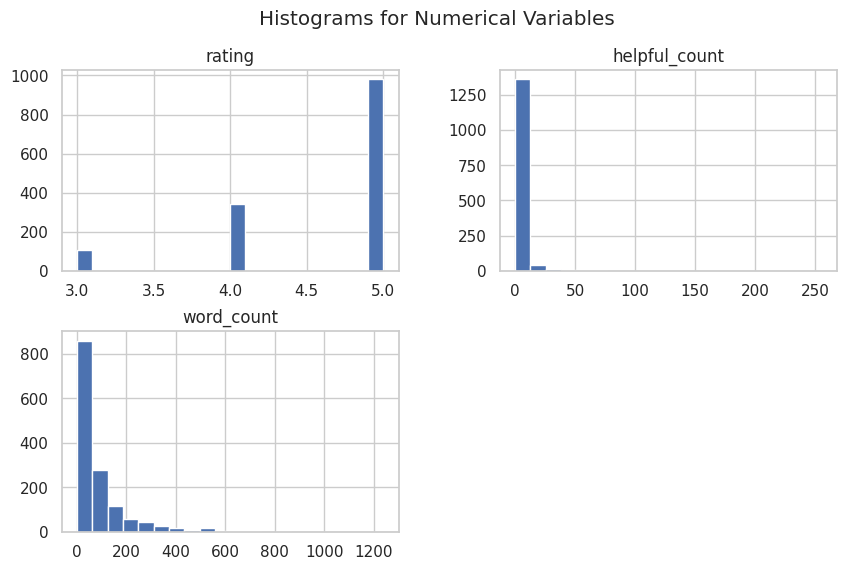

In [ ]:
df[['rating', 'helpful_count','word_count']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms for Numerical Variables')
plt.show()

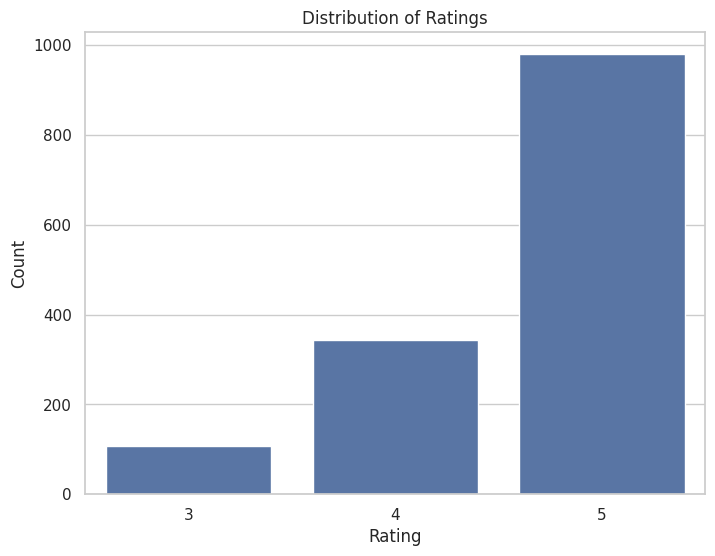

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

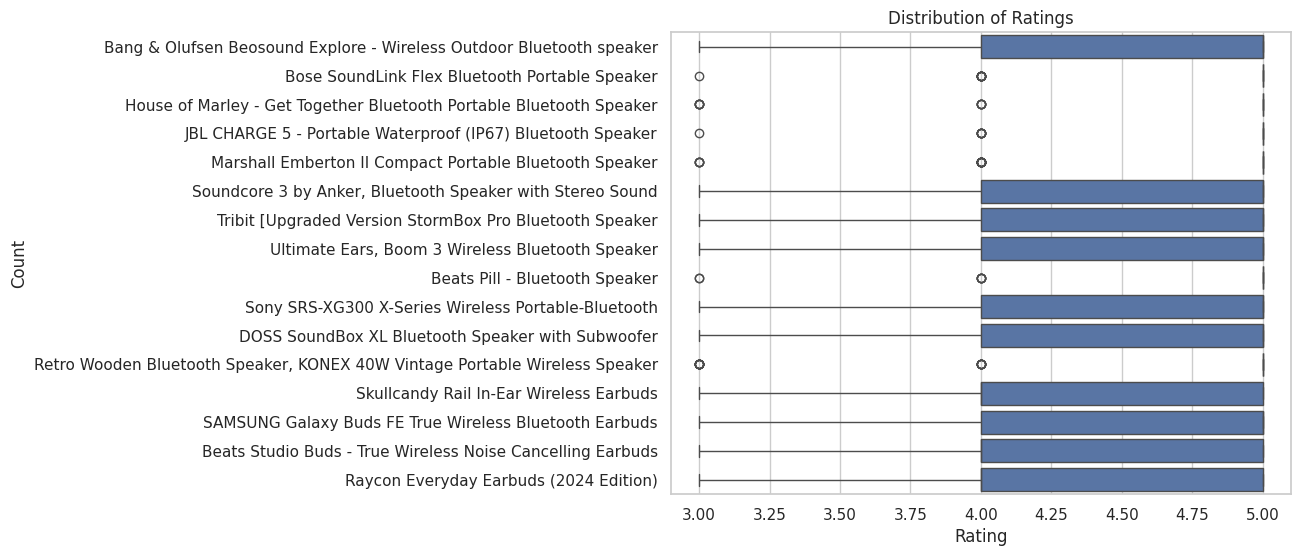

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='product_name', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
correlation_matrix = df[['rating', 'helpful_count','word_count']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Covariance Analysis
covariance_matrix = df[['rating', 'helpful_count','word_count']].cov()
print("Covariance Matrix:")
print(covariance_matrix)

Correlation Matrix:
                 rating  helpful_count  word_count
rating         1.000000       0.021907   -0.146031
helpful_count  0.021907       1.000000    0.577564
word_count    -0.146031       0.577564    1.000000
Covariance Matrix:
                  rating  helpful_count    word_count
rating          0.387714       0.158229    -10.801343
helpful_count   0.158229     134.556219    795.845283
word_count    -10.801343     795.845283  14110.852530


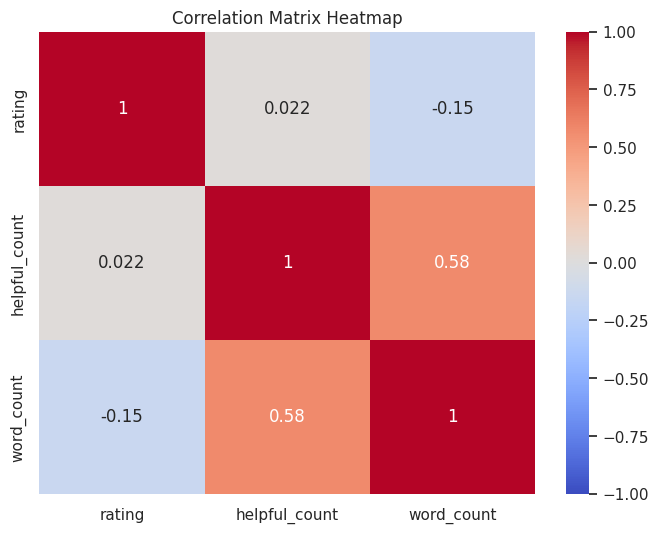

In [ ]:
correlation_matrix = df[['rating', 'helpful_count','word_count']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
product_analysis = df.groupby('product_name').agg({
    'rating': 'mean',
    'helpful_count': 'mean',
    'is_verified': 'mean',
    'word_count': 'mean'
}).reset_index()

print("Product-wise Analysis:")
print(product_analysis)

Product-wise Analysis:
                                         product_name    rating  \
0   Bang & Olufsen Beosound Explore - Wireless Out...  4.577778   
1                      Beats Pill - Bluetooth Speaker  4.804348   
2   Beats Studio Buds - True Wireless Noise Cancel...  4.350515   
3      Bose SoundLink Flex Bluetooth Portable Speaker  4.880000   
4   DOSS SoundBox XL Bluetooth Speaker with Subwoofer  4.473118   
5   House of Marley - Get Together Bluetooth Porta...  4.825581   
6   JBL CHARGE 5 - Portable Waterproof (IP67) Blue...  4.910000   
7   Marshall Emberton II Compact Portable Bluetoot...  4.760000   
8              Raycon Everyday Earbuds (2024 Edition)  4.358209   
9   Retro Wooden Bluetooth Speaker, KONEX 40W Vint...  4.626667   
10  SAMSUNG Galaxy Buds FE True Wireless Bluetooth...  4.660000   
11            Skullcandy Rail In-Ear Wireless Earbuds  4.189474   
12  Sony SRS-XG300 X-Series Wireless Portable-Blue...  4.630435   
13  Soundcore 3 by Anker, Bluetooth Spe

<ipython-input-39-bf1ec81f6b28>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='product_name', data=product_analysis, palette='viridis')


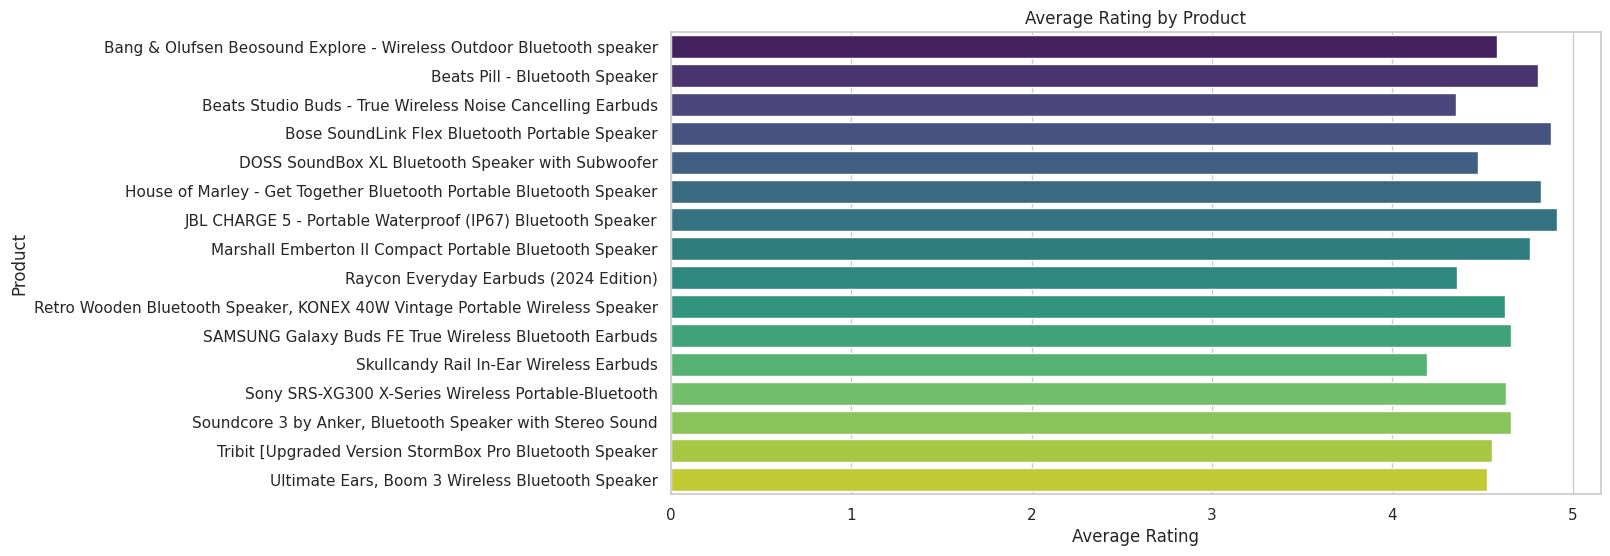

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for average rating by product
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='product_name', data=product_analysis, palette='viridis')
plt.title('Average Rating by Product')
plt.xlabel('Average Rating')
plt.ylabel('Product')
plt.show()


In [ ]:
from textblob import TextBlob

# Function to get the sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the content column
df['sentiment'] = df['content'].apply(get_sentiment)

# Classify the sentiment as positive, negative, or neutral
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis to the content of each review
df['sentiment_score'] = df['content'].apply(get_sentiment)

# Preview the dataset with the new sentiment_score column
print(df[['content', 'sentiment_score']].head())

# Define sentiment categories based on the sentiment score
df['sentiment_category'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Preview the sentiment categories
print(df[['content', 'sentiment_score', 'sentiment_category']].head())

# Calculate the overall average sentiment score
overall_sentiment_score = df['sentiment_score'].mean()
print(f"Overall Average Sentiment Score: {overall_sentiment_score}")

# Count the number of reviews in each sentiment category
sentiment_distribution = df['sentiment_category'].value_counts()
print("\nSentiment Category Distribution:")
print(sentiment_distribution)

                                             content  sentiment_score
0  This is the third different B&O speaker I've b...         0.374111
1  I typically goes to Bose speakers as my first ...         0.168778
2  I bought this to take into my backyard in the ...         0.298258
3  B&O makes posh high end audio gear….gear which...         0.183009
4  Sound quality is very good. The app provides p...         0.210357
                                             content  sentiment_score  \
0  This is the third different B&O speaker I've b...         0.374111   
1  I typically goes to Bose speakers as my first ...         0.168778   
2  I bought this to take into my backyard in the ...         0.298258   
3  B&O makes posh high end audio gear….gear which...         0.183009   
4  Sound quality is very good. The app provides p...         0.210357   

  sentiment_category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  
Ove

<ipython-input-42-2815a7768dcb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='viridis')


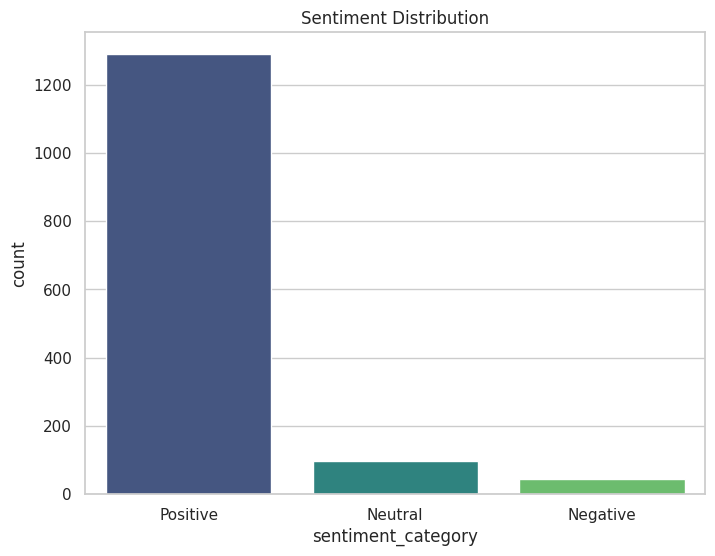

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
sentiment_analysis = df.groupby('sentiment_category').agg({
    'rating': 'mean',
    'helpful_count': 'mean',
    'is_verified': 'mean',
    'word_count': 'mean'
}).reset_index()

<ipython-input-44-e08bd5dd68ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_category', y='rating', data=sentiment_analysis, palette='coolwarm')


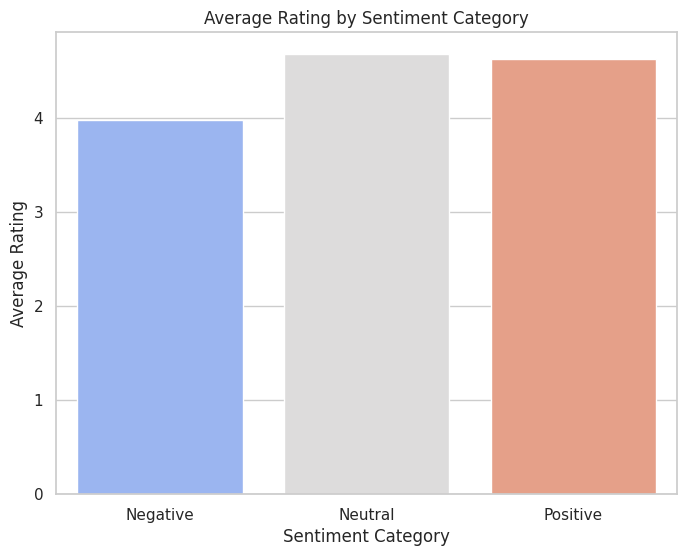

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment_category', y='rating', data=sentiment_analysis, palette='coolwarm')
plt.title('Average Rating by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
earbuds_sentiment = df[df['product_category'] == 'Earbuds']['sentiment_category'].value_counts()
speakers_sentiment = df[df['product_category'] == 'Speaker']['sentiment_category'].value_counts()

print("Earbuds Sentiment Distribution:")
print(earbuds_sentiment)
print("\nSpeakers Sentiment Distribution:")
print(speakers_sentiment)

Earbuds Sentiment Distribution:
sentiment_category
Positive    316
Neutral      23
Negative     20
Name: count, dtype: int64

Speakers Sentiment Distribution:
sentiment_category
Positive    974
Neutral      73
Negative     24
Name: count, dtype: int64


In [ ]:
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,word_count,product_category,sentiment,sentiment_category,sentiment_score
0,R1KTX4USE1JN2Y,B08YRT9T38,"5.0 out of 5 stars Beautiful Sound, Beautiful ...",Ethan Barbee,5,This is the third different B&O speaker I've b...,"Reviewed in the United States September 2, 2024",AEOMNSFUKAOLDVBX7HYX64VEXTEQ,1,0,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,96,Speaker,0.374111,Positive,0.374111
1,R2HAQUWSTPUU1B,B08YRT9T38,"5.0 out of 5 stars Great sound, compact, very ...",Bridget Brooks,5,I typically goes to Bose speakers as my first ...,"Reviewed in the United States July 22, 2024",AEK6OWCPNNGR5I2IFKONWQBWN5GQ,1,1,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,124,Speaker,0.168778,Positive,0.168778
2,R2OXTERJCBYAF0,B08YRT9T38,"5.0 out of 5 stars Nice little speaker, sweet ...",P. Mumford,5,I bought this to take into my backyard in the ...,"Reviewed in the United States July 27, 2024",AEQ34ZA5DNYEPTKOIOMUUUKHPUWQ,1,2,Color: Grey MistStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,121,Speaker,0.298258,Positive,0.298258
3,R2N9LGOT33J14T,B08YRT9T38,4.0 out of 5 stars A Posh Music speaker!,RT - Gadget Guy,4,B&O makes posh high end audio gear….gear which...,"Reviewed in the United States March 3, 2024",AE6TVTGGPRUEMJMSIV5SX6NDA2PA,1,7,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,637,Speaker,0.183009,Positive,0.183009
4,R2X7LV4K100RNI,B08YRT9T38,5.0 out of 5 stars Natural true sounding speaker.,hubbabubba66,5,Sound quality is very good. The app provides p...,"Reviewed in the United States June 24, 2024",AGDYLA7QS2TXWBTITQ2OMV7XNSQQ,1,4,Color: Black AnthraciteStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,96,Speaker,0.210357,Positive,0.210357


In [ ]:
# Separating Beats products for sentiment comparison
beats_earbuds = df[(df['product_name'] == 'Beats Studio Buds - True Wireless Noise Cancelling Earbuds') & (df['product_category'] == 'Earbuds')]
beats_speakers = df[(df['product_name'] == 'Beats Pill - Bluetooth Speaker') & (df['product_category'] == 'Speaker')]

# Calculate sentiment distribution for Beats products
beats_earbuds_sentiment = beats_earbuds['sentiment_category'].value_counts()
beats_speakers_sentiment = beats_speakers['sentiment_category'].value_counts()

# Compare with other brands in the same category
other_earbuds = df[(df['product_name'] != 'Beats Studio Buds - True Wireless Noise Cancelling Earbuds') & (df['product_category'] == 'Earbuds')]
other_speakers = df[(df['product_name'] != 'Beats Pill - Bluetooth Speaker') & (df['product_category'] == 'Speaker')]

other_earbuds_sentiment = other_earbuds['sentiment_category'].value_counts()
other_speakers_sentiment = other_speakers['sentiment_category'].value_counts()

print("\nBeats Earbuds Sentiment Distribution:")
print(beats_earbuds_sentiment)
print("\nOther Earbuds Sentiment Distribution:")
print(other_earbuds_sentiment)

print("\nBeats Speakers Sentiment Distribution:")
print(beats_speakers_sentiment)
print("\nOther Speakers Sentiment Distribution:")
print(other_speakers_sentiment)


Beats Earbuds Sentiment Distribution:
sentiment_category
Positive    85
Negative     8
Neutral      4
Name: count, dtype: int64

Other Earbuds Sentiment Distribution:
sentiment_category
Positive    231
Neutral      19
Negative     12
Name: count, dtype: int64

Beats Speakers Sentiment Distribution:
sentiment_category
Positive    42
Neutral      3
Negative     1
Name: count, dtype: int64

Other Speakers Sentiment Distribution:
sentiment_category
Positive    932
Neutral      70
Negative     23
Name: count, dtype: int64


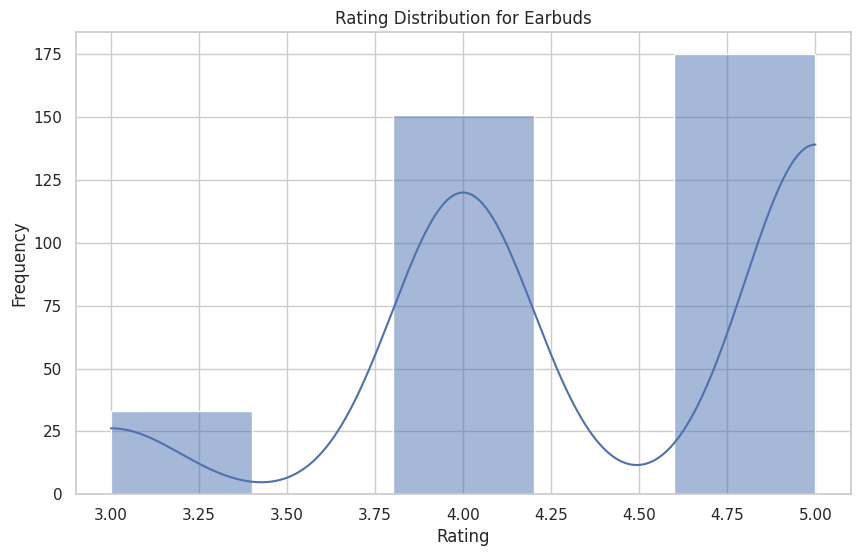

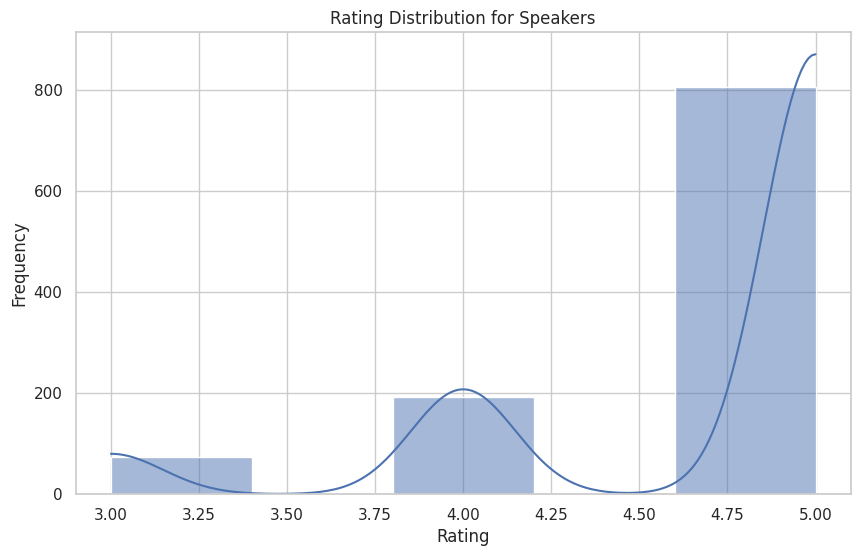

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['product_category'] == 'Earbuds']['rating'], kde=True, bins=5)
plt.title('Rating Distribution for Earbuds')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot rating distribution for Speakers
plt.figure(figsize=(10, 6))
sns.histplot(df[df['product_category'] == 'Speaker']['rating'], kde=True, bins=5)
plt.title('Rating Distribution for Speakers')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Analyze neutral and negative sentiments for Beats Studio Buds
beats_earbuds_neutral_negative = beats_earbuds[beats_earbuds['sentiment_category'].isin(['Neutral', 'Negative'])]
print("Beats Studio Buds - Neutral and Negative Reviews:")
print(beats_earbuds_neutral_negative[['rating', 'content']].head())

# Analyze neutral and negative sentiments for Beats Pill
beats_speakers_neutral_negative = beats_speakers[beats_speakers['sentiment_category'].isin(['Neutral', 'Negative'])]
print("\nBeats Pill - Neutral and Negative Reviews:")
print(beats_speakers_neutral_negative[['rating', 'content']].head())

Beats Studio Buds - Neutral and Negative Reviews:
      rating                                            content
1521       5  I had a set of air pod pros that began to ratt...
1524       4  I have no problem with beat headphones I just ...
1530       4  They are comfortable for long hours listening ...
1531       4  Saw these on TV and decided to order for my wi...
1539       4  If you have small ears, these are not for you....

Beats Pill - Neutral and Negative Reviews:
     rating                                            content
812       5  Excelente compra, gran sonido y duración de la...
822       5                                           Buenardo
824       5       This thing hits you will not be disappointed
841       5                                          Excelente


In [ ]:
df_other_products = df[~df['product_name'].str.contains('Beats')]

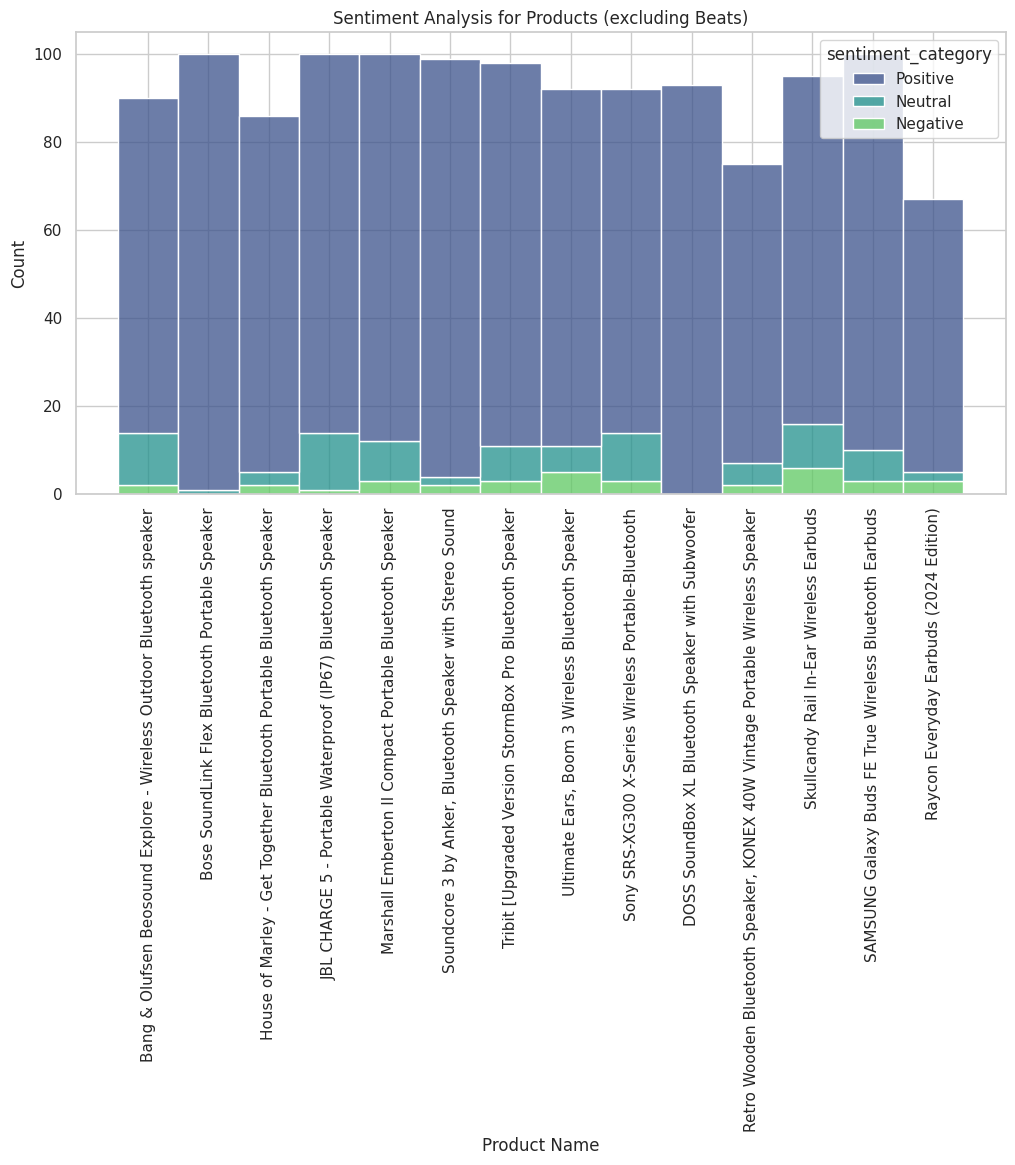

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(
    df_other_products,
    x='product_name',
    hue='sentiment_category',
    multiple='stack',
    palette='viridis',
)
plt.title('Sentiment Analysis for Products (excluding Beats)')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

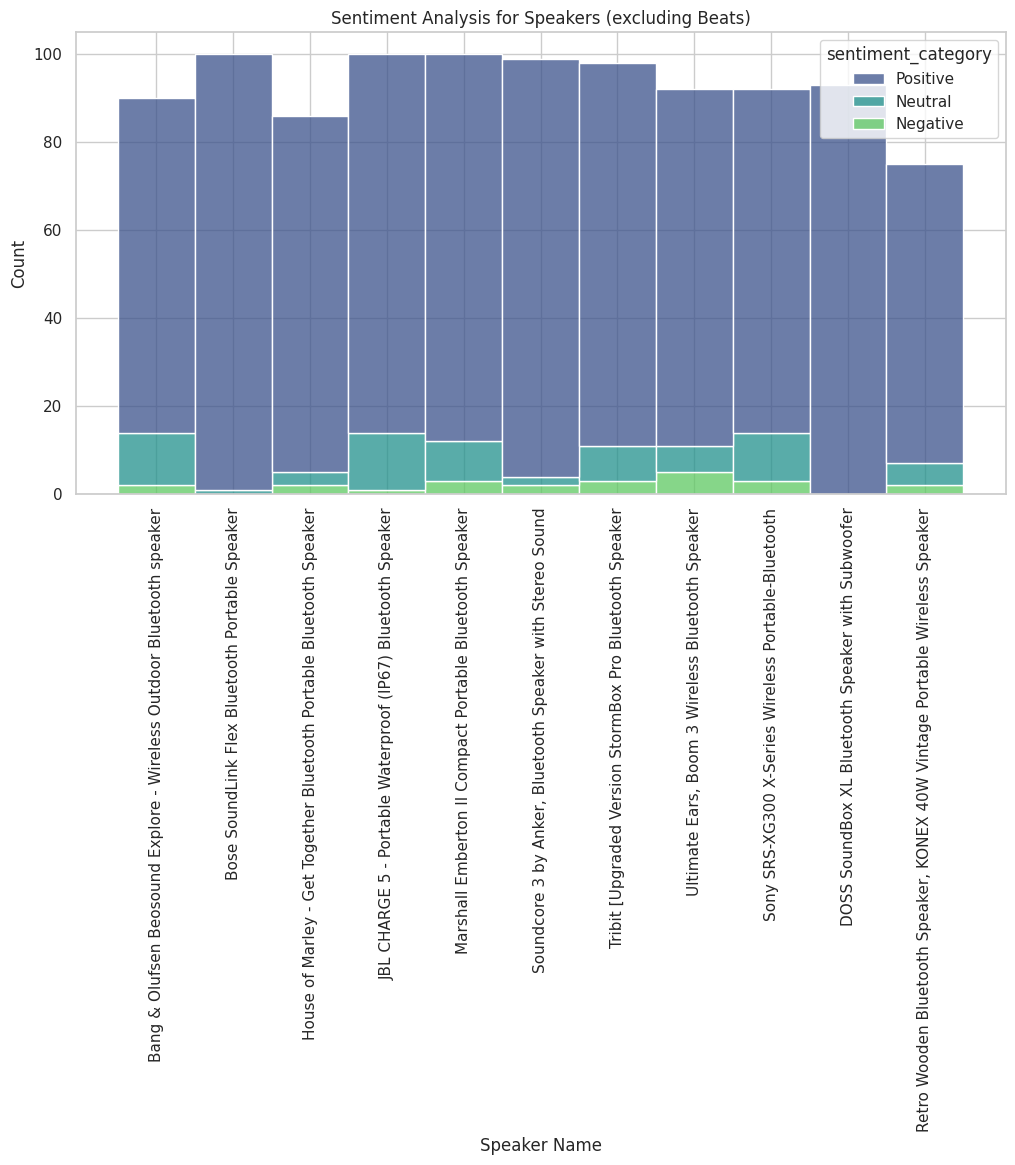

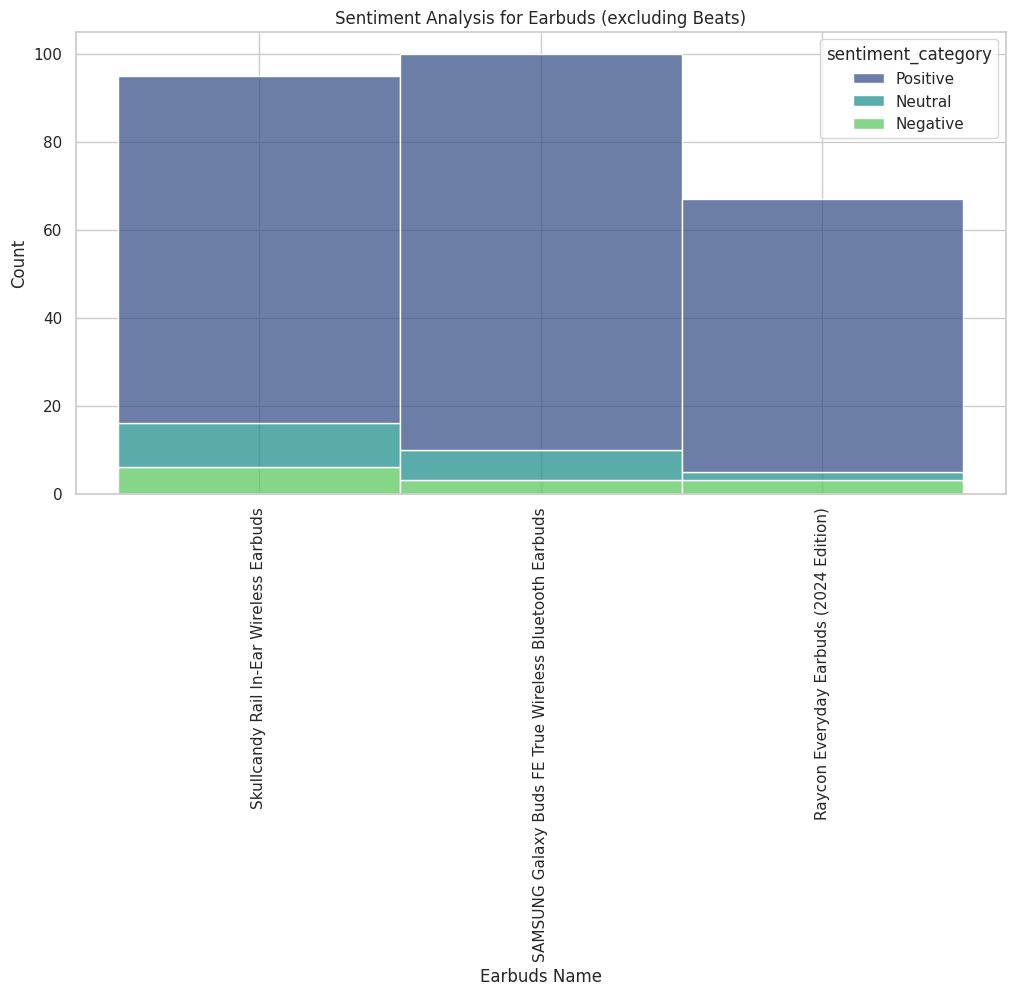

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(
    df_other_products[df_other_products['product_category'] == 'Speaker'],
    x='product_name',
    hue='sentiment_category',
    multiple='stack',
    palette='viridis',
)
plt.title('Sentiment Analysis for Speakers (excluding Beats)')
plt.xlabel('Speaker Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(
    df_other_products[df_other_products['product_category'] == 'Earbuds'],
    x='product_name',
    hue='sentiment_category',
    multiple='stack',
    palette='viridis',
)
plt.title('Sentiment Analysis for Earbuds (excluding Beats)')
plt.xlabel('Earbuds Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Word cloud of review text
from wordcloud import WordCloud

In [ ]:
# Combine all review text into a single string
all_reviews = ' '.join(df['content'].dropna())

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

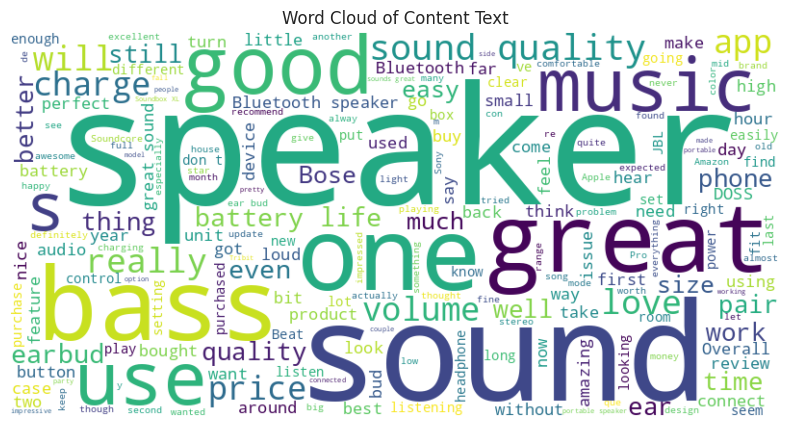

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Text')
plt.show()


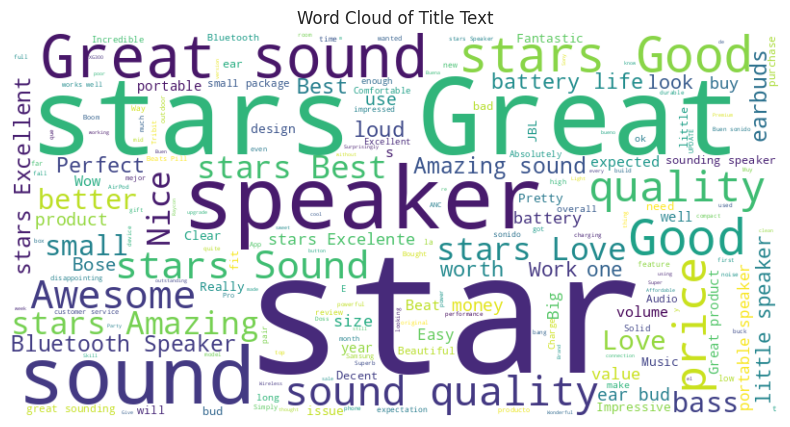

In [ ]:
all_titles = ' '.join(df['title'].dropna())
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Text')
plt.show()



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = list(df_reviews['product_attributes'])

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
tfidf_scores = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=10, prefer_horizontal=0.7)
wordcloud.generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'df_reviews' is not defined

In [ ]:
df.to_csv('modified_beats_reviews.csv', index=False)